In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filepath = "data/concrete.csv"
concrete_strength = pd.read_csv(filepath)
concrete_strength.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
from sklearn.linear_model import LinearRegression
concrete_strength.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

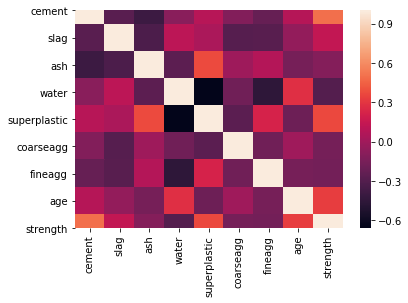

In [4]:
sns.heatmap(concrete_strength.corr())

In [5]:
X = concrete_strength[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age', 'strength']]
y = concrete_strength['strength']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

3.197442310920451e-13


,Coefficient
cement,-2.337668e-16
slag,-1.986928e-16
ash,-2.704881e-16
water,2.165825e-16
superplastic,3.089166e-16
coarseagg,-1.038194e-16
fineagg,-2.531440e-16
age,-4.541111e-17
strength,1.000000e+00


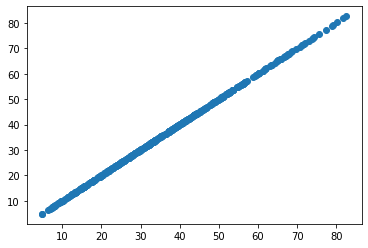

In [12]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

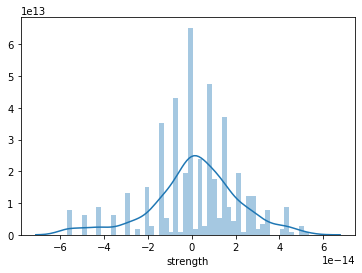

In [8]:
sns.distplot((y_test-predictions), bins=50)

In [9]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.4904151268055307e-14
MSE: 4.0648547265728135e-28
RMSE: 2.0161484882252135e-14


In [10]:
pd.DataFrame(lm.coef_)

,0
0,-2.337668e-16
1,-1.986928e-16
2,-2.704881e-16
3,2.165825e-16
4,3.089166e-16
5,-1.038194e-16
6,-2.531440e-16
7,-4.541111e-17
8,1.000000e+00
